The purpose of this excercise is to create a PCA and t-SNE plot of data and label it using clusters found via k-means algorithm.

In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import csv

data = []
first_line = True

with open('E-MTAB-5214-query-results.tpms.tsv') as fid:
    csvfile = csv.reader(fid, delimiter= '\t')
    for line in csvfile:
        if first_line:
            names = line
            first_line = False
        else:
            data.append(line)
data = np.array(data)

X = []

for line in data[:,2:]:
    row = []
    for x in line:
        if x and  x!= '0.2s':
            row.append(float(x))
        else:
            row.append(0.0)
    X.append(row)

X = np.array(X)

Apply k-means

In [9]:
kmeans = KMeans(n_clusters=50).fit(X)
L = kmeans.labels_
centroids = kmeans.cluster_centers_

Attemping a PCA with the same data

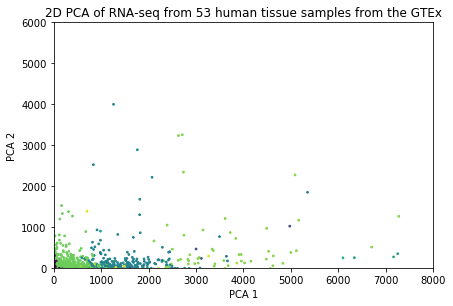

In [25]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

fig, ax = plt.subplots()

fig.tight_layout()
plt.scatter(X_r[:,0], X_r[:,1], 3, L)
plt.axis((0, 8000, 0, 6000))
plt.title("2D PCA of RNA-seq from 53 human tissue samples from the GTEx")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Scatter plot of the first two principal components of the data with 50 Kmeans clusters of varying colors

In [ ]:
num_sub = 5000 # subset of points
idx = np.random.permutation(X.shape[0])

X_embedded = TSNE(n_components=2).fit_transform(X[idx[:num_sub]])

plt.scatter(X_embedded[:,0], X_embedded[:,1], 3, L[idx[:num_sub]])
plt.title("2D t-SNE plot of RNA-seq from 53 human tissue samples from the GTEx")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()